#📌 Extracción

In [ ]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#🔧 Transformación

##Conociendo los datos

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [83]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [84]:
# Normalización de columnas
from pandas import json_normalize

df_normalizado = json_normalize(data)

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [85]:
df_normalizado.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


## Diccionario de datos

*   customerID: número de identificación único de cada cliente
*   Churn: si el cliente dejó o no la empresa
*   gender: género (masculino y femenino)
*   SeniorCitizen: información sobre si un cliente tiene 65 años o más
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripción de servicio telefónico
*   MultipleLines: suscripción a más de una línea de teléfono
*   InternetService: suscripción a un proveedor de internet
*   OnlineSecurity: suscripción adicional de seguridad online
*   OnlineBackup: suscripción adicional de backup online
*   DeviceProtection: suscripción adicional de protección en el dispositivo
*   TechSupport: suscripción adicional de soporte técnico, menos tiempo de espera
*   StreamingTV: suscripción de TV por cable
*   StreamingMovies: suscripción de streaming de películas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente




#📊 Carga y Análisis

## Descirpción de datos

In [ ]:
#Verificar si hay datos nulos en las columnas

df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
# Verificar valores vacíos

df_normalizado.isna().sum()

,0
customerid,0
churn,0
customer.gender,0
customer.seniorcitizen,0
customer.partner,0
customer.dependents,0
customer.tenure,0
phone.phoneservice,0
phone.multiplelines,0
internet.internetservice,0


In [ ]:
# Verificar si hay duplicados en el DataFrame
print(df_normalizado.duplicated().sum())

0


In [ ]:
# Normalización de texto

df_normalizado.columns = df_normalizado.columns.str.replace(' ', '')
df_normalizado.columns = df_normalizado.columns.str.lower()
print(df_normalizado.head())

   customerid churn customer.gender  customer.seniorcitizen customer.partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.dependents  customer.tenure phone.phoneservice phone.multiplelines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.internetservice  ... 

In [ ]:
# Identificación de datos de abandono

print(df_normalizado['churn'].value_counts())

churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [ ]:
# Filtrado de dataframe solo por los valores de Churn

df_filtrado = df_normalizado[df_normalizado['churn'].isin(['Yes', 'No'])].copy()
print(df_filtrado['churn'].value_counts())

churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
# Creación de columna de "cuentas_diarias"

df_filtrado['cuentas_diarias'] = df_filtrado['account.charges.monthly'].sum()

In [60]:
# Descripciónn estadística del dataframe

df_filtrado.describe()

,customer.seniorcitizen,customer.tenure,account.charges.monthly,account.charges.total,cuentas_diarias,churn_numeric
count,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,4.561166e+05,0.265785
std,0.368844,24.545260,30.085974,2266.771362,5.780432e-08,0.441782
min,0.000000,1.000000,18.250000,18.800000,4.561166e+05,0.000000
25%,0.000000,9.000000,35.587500,401.450000,4.561166e+05,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,4.561166e+05,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,4.561166e+05,1.000000
max,1.000000,72.000000,118.750000,8684.800000,4.561166e+05,1.000000


## Gráficas

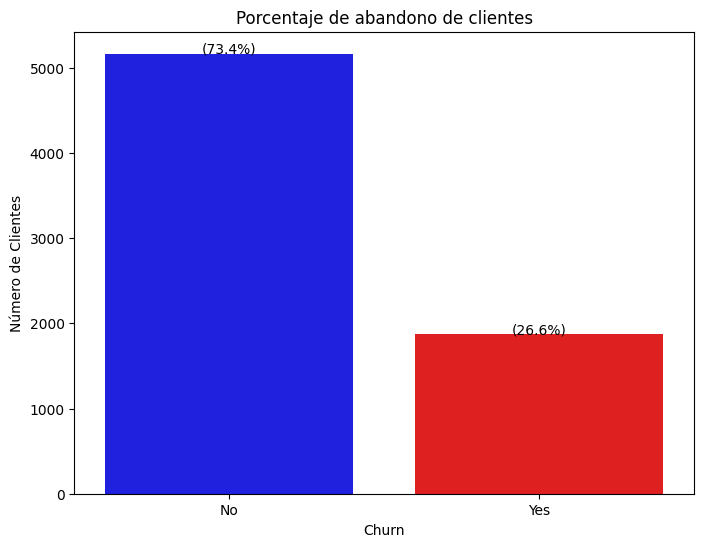

In [90]:
# Abandono de clientes

df_filtrado['churn'] = df_filtrado['churn'].astype('category')

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='churn', data=df_filtrado, hue='churn', palette={'No': 'blue', 'Yes': 'red'}, legend=False) # Use hue to apply different colors based on churn value

plt.title('Porcentaje de abandono de clientes')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')


total = len(df_filtrado)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5,
            f'({height/total:.1%})',
            ha="center")

plt.show()


/tmp/ipython-input-91-3093137810.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



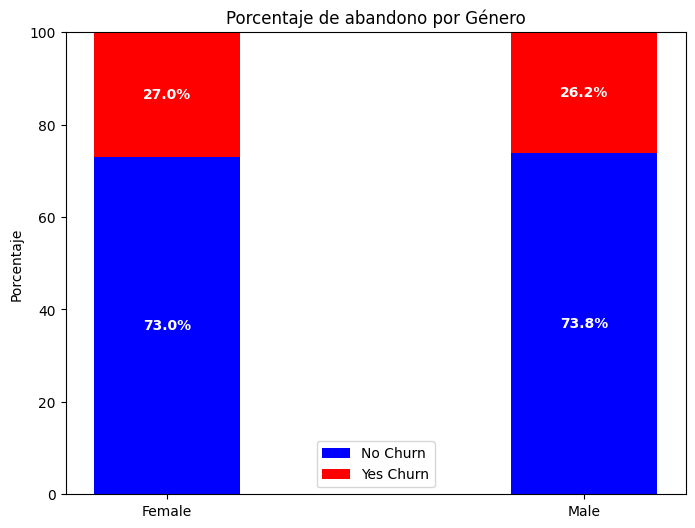

In [91]:
# Porcentaje de abandono por género

churn_gender = df_filtrado.groupby(['customer.gender', 'churn']).size().unstack()
churn_gender['Total'] = churn_gender['No'] + churn_gender['Yes']
churn_gender['Percentage_Yes'] = (churn_gender['Yes'] / churn_gender['Total']) * 100
churn_gender['Percentage_No'] = (churn_gender['No'] / churn_gender['Total']) * 100

plt.figure(figsize=(8, 6))
bar_width = 0.35
plt.bar(churn_gender.index, churn_gender['Percentage_No'], bar_width, label='No Churn', color='blue')
plt.bar(churn_gender.index, churn_gender['Percentage_Yes'], bar_width, bottom=churn_gender['Percentage_No'], label='Yes Churn', color='red')

plt.ylabel('Porcentaje')
plt.title('Porcentaje de abandono por Género')
plt.xticks(churn_gender.index)
plt.legend()
plt.ylim(0, 100)

for i, gender in enumerate(churn_gender.index):
    plt.text(i, churn_gender.loc[gender, 'Percentage_No'] / 2,
             f'{churn_gender.loc[gender, "Percentage_No"]:.1f}%',
             ha='center', va='center', color='white', fontweight='bold')
    plt.text(i, churn_gender.loc[gender, 'Percentage_No'] + churn_gender.loc[gender, 'Percentage_Yes'] / 2,
             f'{churn_gender.loc[gender, "Percentage_Yes"]:.1f}%',
             ha='center', va='center', color='white', fontweight='bold')


plt.show()

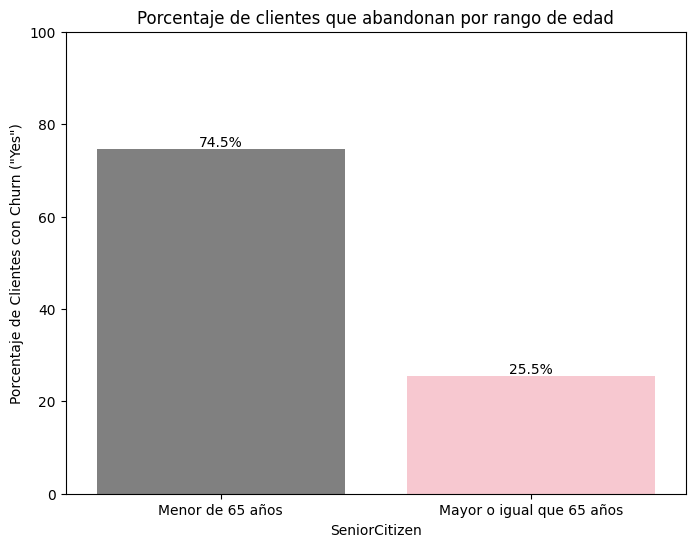

In [89]:
# Porcentaje de abandono por edad del cliente (menores o mayores de 65 años)

df_churn_yes = df_filtrado[df_filtrado['churn'] == 'Yes'].copy()

df_churn_yes['customer.seniorcitizen'] = df_churn_yes['customer.seniorcitizen'].astype(str)

churn_senior = df_churn_yes.groupby('customer.seniorcitizen').size().reset_index(name='count')
churn_senior['percentage'] = (churn_senior['count'] / churn_senior['count'].sum()) * 100

churn_senior['senior_label'] = churn_senior['customer.seniorcitizen'].map({'0': 'Menor de 65 años', '1': 'Mayor o igual que 65 años'})

# Gráfica
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='senior_label', y='percentage', data=churn_senior, hue='senior_label', palette={'Menor de 65 años': 'gray', 'Mayor o igual que 65 años': 'pink'})

plt.title('Porcentaje de clientes que abandonan por rango de edad')
plt.xlabel('SeniorCitizen')
plt.ylabel('Porcentaje de Clientes con Churn ("Yes")')
plt.ylim(0, 100)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

/tmp/ipython-input-92-2005943130.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



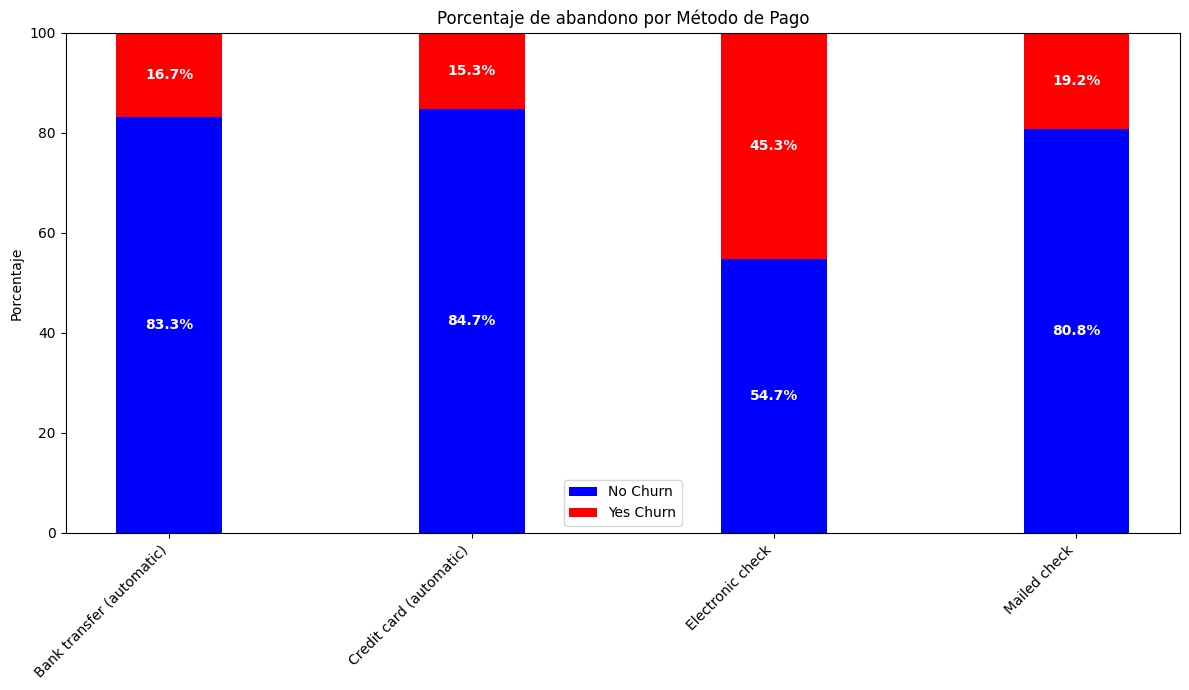

In [92]:
# Gráfica de Porcentaje de abandono por Método de Pago

churn_payment = df_filtrado.groupby(['account.paymentmethod', 'churn']).size().unstack()
churn_payment['Total'] = churn_payment['No'] + churn_payment['Yes']
churn_payment['Percentage_Yes'] = (churn_payment['Yes'] / churn_payment['Total']) * 100
churn_payment['Percentage_No'] = (churn_payment['No'] / churn_payment['Total']) * 100

# Graficar el porcentaje de churn por método de pago
plt.figure(figsize=(12, 7))
bar_width = 0.35

# Graficar el porcentaje de 'No' Churn en azul
plt.bar(churn_payment.index, churn_payment['Percentage_No'], bar_width, label='No Churn', color='blue')

# Graficar el porcentaje de 'Yes' Churn en rojo
plt.bar(churn_payment.index, churn_payment['Percentage_Yes'], bar_width, bottom=churn_payment['Percentage_No'], label='Yes Churn', color='red')

plt.ylabel('Porcentaje')
plt.title('Porcentaje de abandono por Método de Pago')
plt.xticks(churn_payment.index, rotation=45, ha='right') # Rotar las etiquetas para mejor visualización
plt.legend()
plt.ylim(0, 100) # Asegurar que el eje Y va de 0 a 100
plt.tight_layout() # Ajustar el layout para evitar que las etiquetas se corten

# Añadir las etiquetas de porcentaje
for i, method in enumerate(churn_payment.index):
    plt.text(i, churn_payment.loc[method, 'Percentage_No'] / 2,
             f'{churn_payment.loc[method, "Percentage_No"]:.1f}%',
             ha='center', va='center', color='white', fontweight='bold')
    plt.text(i, churn_payment.loc[method, 'Percentage_No'] + churn_payment.loc[method, 'Percentage_Yes'] / 2,
             f'{churn_payment.loc[method, "Percentage_Yes"]:.1f}%',
             ha='center', va='center', color='white', fontweight='bold')


plt.show()


/tmp/ipython-input-93-1698612700.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



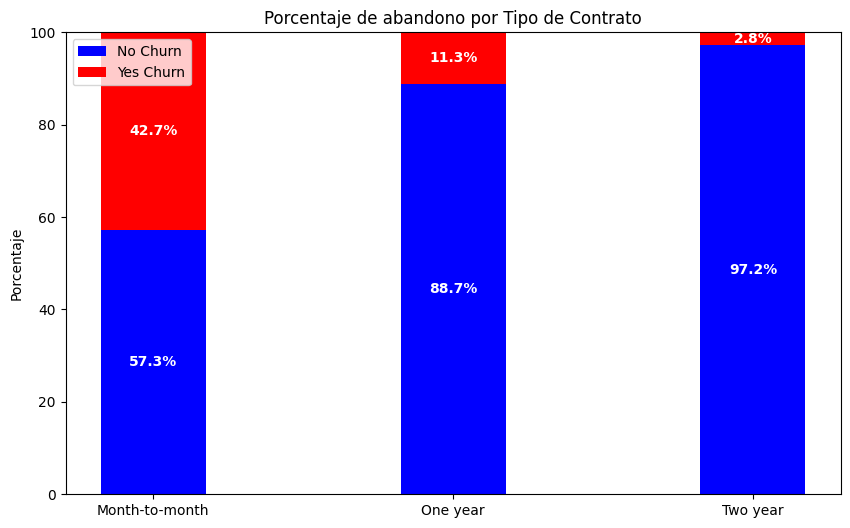

In [93]:
# Porcentaje de churn por tipo de contrato

churn_contract = df_filtrado.groupby(['account.contract', 'churn']).size().unstack()
churn_contract['Total'] = churn_contract['No'] + churn_contract['Yes']
churn_contract['Percentage_Yes'] = (churn_contract['Yes'] / churn_contract['Total']) * 100
churn_contract['Percentage_No'] = (churn_contract['No'] / churn_contract['Total']) * 100

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(churn_contract.index, churn_contract['Percentage_No'], bar_width, label='No Churn', color='blue')

plt.bar(churn_contract.index, churn_contract['Percentage_Yes'], bar_width, bottom=churn_contract['Percentage_No'], label='Yes Churn', color='red')

plt.ylabel('Porcentaje')
plt.title('Porcentaje de abandono por Tipo de Contrato')
plt.xticks(churn_contract.index)
plt.legend()
plt.ylim(0, 100)

for i, contract in enumerate(churn_contract.index):
    plt.text(i, churn_contract.loc[contract, 'Percentage_No'] / 2,
             f'{churn_contract.loc[contract, "Percentage_No"]:.1f}%',
             ha='center', va='center', color='white', fontweight='bold')
    plt.text(i, churn_contract.loc[contract, 'Percentage_No'] + churn_contract.loc[contract, 'Percentage_Yes'] / 2,
             f'{churn_contract.loc[contract, "Percentage_Yes"]:.1f}%',
             ha='center', va='center', color='white', fontweight='bold')

plt.show()

In [69]:
# Boxplot de cargo total y abandono

import plotly.express as px
df_filtrado['account.charges.total'] = pd.to_numeric(df_filtrado['account.charges.total'], errors='coerce')

df_filtrado.dropna(subset=['account.charges.total'], inplace=True)


fig = px.box(df_filtrado, x="churn", y="account.charges.total",
             color="churn",
             color_discrete_map={'No': 'blue', 'Yes': 'red'},
             title="Distribución de cargo total entre clientes que abandonan y no abandonan")
fig.update_layout(xaxis_title="Abandona", yaxis_title="Cargo total")
fig.show()

In [59]:
# Distribución del abandono de clientes po Tiempo de contrato
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_filtrado['customer.tenure'] = pd.to_numeric(df_filtrado['customer.tenure'], errors='coerce')
df_filtrado.dropna(subset=['customer.tenure'], inplace=True)

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('No Churn', 'Yes Churn'),
                    shared_yaxes=True)

df_no_churn = df_filtrado[df_filtrado['churn'] == 'No']
df_yes_churn = df_filtrado[df_filtrado['churn'] == 'Yes']

fig.add_trace(go.Histogram(x=df_no_churn['customer.tenure'],
                           name='No Churn',
                           marker_color='blue',
                           nbinsx=30
                           ),
              row=1, col=1)

fig.add_trace(go.Histogram(x=df_yes_churn['customer.tenure'],
                           name='Yes Churn',
                           marker_color='red',
                           nbinsx=30
                           ),
              row=1, col=2)

fig.update_layout(
    title_text='Distribución del abandono de clientes po Tiempo de contrato',
    xaxis1_title='Meses de Contrato (Tenure)',
    xaxis2_title='Meses de Contrato (Tenure)',
    yaxis_title='Frecuencia',
    bargap=0.1
)

fig.show()

#📄Informe final

## Objetivo del análisis:
La empresa TelecomX desea conocer cómo se está comportando la evasión o el abandono de los clientes (churn) a través de un análisis exploratorio de sus datos.
Los datos que se comparten para realizar el proceso de ETL contienen información como el ID de clientes, el total de pago mensual, el género, el tiempo y tipo de suscripción y de acuerdo con la edad, si son menores o mayores a 65 años, entre otros.

## Limpieza y Tratamiento de los datos
La carga de los datos se realizó mediante una API para obtener un JSON.
Se realizó la normalización de los datos y se determinó los valores nulos o vacios del dataframe.
Posteriormente se realizó la limpieza filtrando solo por aquellos datos que contenían valores en "Churn", ya que es la columna clave para el objetivo del negocio.

## Análisis Exploratorio de Datos
Se realizó el análisis descriptivo de los datos. También se creó una columna de "Cuentas diarias" con la finalidad de tener la cantidad que cada cliente paga día con día.
Para realizar un mejor análsisi se generaron varias gráficas con respecto al abandono de los clientes, contrastando por género, edad, tipo de contrato y  tiempo de contrato.
También se incluye la gráfica de abandono por método de pago.

## Conclusiones e Insights
Los principales hallazgos son que del total de datos que contienen información sobre el abandono de los clientes, el 26.6% sí abandona a la empresa TelecomX.  Además, el porcentaje de abandono es muy similar la cantidad de clientes del genero femenino que masculino, siendo ligeramente mayor el porcentaje del género femenino que abandonó a la empresa (26.9% vs 26.2%) En cuanto al rango de edad, los clientes con edad menor de 65 años representan el 74.5% de los clientes que abandonan.
Por otro lado, el método de pago de “electronic check” es mediante el cuál los clientes abandonan más a la empresa, manteniéndose más fieles con el pago automático de la tarjeta de crédito. De igual forma, los clientes con el tipo de contrato de mes a mes abandonan más que aquellos que tienen un contrato de 2 años (42.7% vs 2.8%).
En cuanto al cargo total, se aprecia en el boxplot que los clientes que abandonan presentan un menor cargo total que los clientes que no abandona, sin embargo, en el abandono se observan mayores outliers. Estos valores atípicos están por encima del cargo total con un valor de 8000.
Por último, se obtuvo un histograma para los clientes que abandonan y los que no abandonan para conocer la distribución de los meses de contrato, observando que entre 0 a 4 meses y de 70 a 74 meses de contrato hay un mayor número de clientes que no abandonan, sin embargo, entre el resto de los rangos de meses, la frecuencia es muy similar por encima de los 250. En contraste, los clientes que abandonan en su mayoría presentan tiempos de contrato de entre 0 a 4 meses, el resto es por debajo de los 250 de frecuencia.


## Recomendaciones
Se recomienda que la empresa TelecomX opte por ofrecer métodos de pago más apegado a la tarjeta de crédito o a las transferencias bancarias, es decir, métodos electrónicos para disminuir el abandono de los clientes
También se sugiere el cambio de tipo de contrato de mes a mes por uno o dos años. Así mismo, ofrecer alternativas para que los clientes tengan tiempos os de contrato más cortos y se evite el abandono.
Por último, se sugiere generar estrategias de retención para clientes menores de 65 años.
